In [1]:
import numpy as np
from scipy.io import loadmat
from matplotlib.animation import FuncAnimation
from matplotlib import pyplot as plt
import skimage as sk
import pandas as pd
import time
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp

# LAB 6

#### 1. Draw the pulse sequence diagram (including indication of the RF pulses, signal acquisition times, TE and TR). Compute the total study duration.

![alt text](q1v2.jpg "Question 1")



Total duration = $ TR \times NEX = 1000 \times 10 = 10000 \; ms = 10 \; s $

In [2]:
T1 = 800*10**-3
T2 = 80*10**-3
TE = 1*10**-3 
TR = 1000*10**-3
NEX = 10
angle = 60*np.pi/180
step = 1*10**-3

#### 2. Simulate the evolution of the longitudinal and transverse magnetization during the  sequence. Indicate which component of the magnetization is measured and plot its amplitude at each acquisition time

In [3]:
rotation_matrix = np.array([[1,0,0],
                          [0,np.cos(angle),np.sin(angle)],
                          [0,-np.sin(angle),np.cos(angle)]])

relax_matrix = np.array([[np.exp(-step/T2), 0, 0],
                         [0, np.exp(-step/T2), 0],
                         [0, 0, np.exp(-step/T1)]]) #relaxation matrix

M0 = np.array([[0,0,1]]).transpose() #initial magnetization vector

M = np.zeros((3,int((TR*NEX)/step)+1)) #magnetization vector

# 10 excitations every TR

exc_times = np.arange(TR/step,(TR*NEX)/step,TR/step) #excitation times

for i in range(0,int((TR*NEX)/step)+1):
    if i == 0:
        M[:,0:1] = np.dot(rotation_matrix,M0)
        M[:,0:1] = np.dot(relax_matrix, np.array([M[:,0]]).transpose()) + np.array([[0,0,(1-np.exp(-step/T1))]]).transpose()
    elif i in exc_times:
        M[:,i:i+1]=np.dot(rotation_matrix,np.array([M[:,i-1]]).transpose())
        M[:,i:i+1]=np.dot(relax_matrix, np.array([M[:,i]]).transpose()) + np.array([[0,0,(1-np.exp(-step/T1))]]).transpose()
    else:
        M[:,i:i+1]=np.dot(relax_matrix, np.array([M[:,i-1]]).transpose()) + np.array([[0,0,(1-np.exp(-step/T1))]]).transpose()



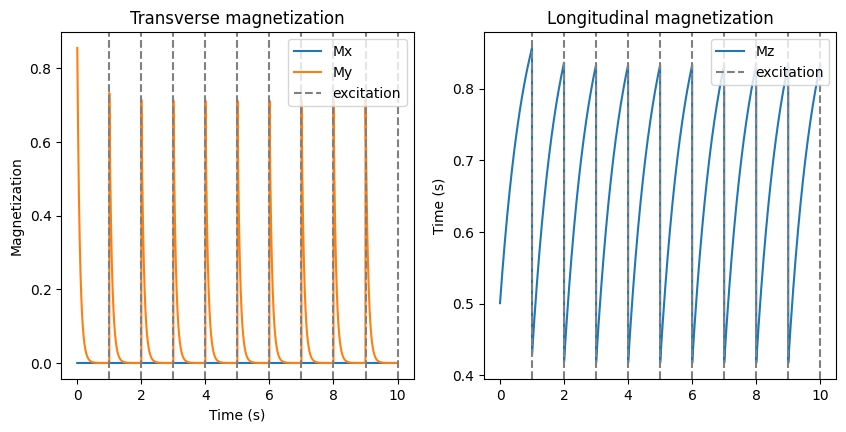

In [4]:
# create vector t for plotting
t = np.array(np.arange(0,TR*NEX+step,step))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5), sharex=True)
ax1.plot(t, np.array([M[0,:]])[0], label='Mx')
ax1.plot(t, np.array([M[1,:]])[0], label='My')
ax1.axvline(TR, linestyle = "dashed", color = "grey", label = "excitation")
ax1.axvline(2*TR, linestyle = "dashed", color = "grey")
ax1.axvline(3*TR, linestyle = "dashed", color = "grey")
ax1.axvline(4*TR, linestyle = "dashed", color = "grey")
ax1.axvline(5*TR, linestyle = "dashed", color = "grey")
ax1.axvline(6*TR, linestyle = "dashed", color = "grey")
ax1.axvline(7*TR, linestyle = "dashed", color = "grey")
ax1.axvline(8*TR, linestyle = "dashed", color = "grey")
ax1.axvline(9*TR, linestyle = "dashed", color = "grey")
ax1.axvline(10*TR, linestyle = "dashed", color = "grey")
ax1.set_ylabel("Magnetization")
ax1.set_xlabel("Time (s)")
ax1.legend(loc='upper right')
ax2.plot(t, np.array([M[2,:]])[0], label='Mz')
ax2.axvline(TR, linestyle = "dashed", color = "grey", label = "excitation")
ax2.axvline(2*TR, linestyle = "dashed", color = "grey")
ax2.axvline(3*TR, linestyle = "dashed", color = "grey")
ax2.axvline(4*TR, linestyle = "dashed", color = "grey")
ax2.axvline(5*TR, linestyle = "dashed", color = "grey")
ax2.axvline(6*TR, linestyle = "dashed", color = "grey")
ax2.axvline(7*TR, linestyle = "dashed", color = "grey")
ax2.axvline(8*TR, linestyle = "dashed", color = "grey")
ax2.axvline(9*TR, linestyle = "dashed", color = "grey")
ax2.axvline(10*TR, linestyle = "dashed", color = "grey")
ax1.set_title('Transverse magnetization')
ax2.set_title('Longitudinal magnetization')
ax2.set_ylabel("Time (s)")
ax2.legend(loc='upper right')

#### 3. Calculate the steady-state magnetization, Mss, and determine this from the data.

Theoretical steady-state values
- $M_{ss_z} = \frac{1-\exp{(-\frac{T_R}{T_1}})}{1-\cos{\theta} \; \times \; \exp{(-\frac{T_R}{T_1}})}$
- $M_{ss_y} = \frac{\sin{\theta} \; \times \; (1-\exp{(-\frac{T_R}{T_1}}))}{1-\cos{\theta} \;\times \; \exp{(-\frac{T_R}{T_1}})} \times exp{(-\frac{T_E}{T_2*}}) $

In [5]:
Mss_z = (1-np.exp(-TR/T1))/(1-np.cos(angle)*np.exp(-TR/T1))
print(round(Mss_z,4))

0.8328


In [6]:
Mss_y = (np.sin(angle)*(1-np.exp(-TR/T1))/(1-np.cos(angle)*np.exp(-TR/T1)))*np.exp(-TE/T2) # in reality, it is calculated using T2*, it will result in a lower value
print(round(Mss_y,4))

0.7123


Mss from data

In [7]:
#1st method


Mz = np.array(M[2,:])

# get Mzs at excitation times
Mz_exc = np.array([Mz[1000-1], Mz[2000-1], Mz[3000-1], Mz[4000-1], Mz[5000-1], Mz[6000-1], Mz[7000-1], Mz[8000-1], Mz[9000-1], Mz[10000-1]])
print(np.around(Mz_exc,4))

[0.8567 0.8362 0.8333 0.8329 0.8328 0.8328 0.8328 0.8328 0.8328 0.8328]


In [8]:
# 2nd method

peaks = sp.signal.find_peaks(np.array([M[2,:]])[0])

In [9]:
print(peaks[0])

[ 999 1999 2999 3999 4999 5999 6999 7999 8999]


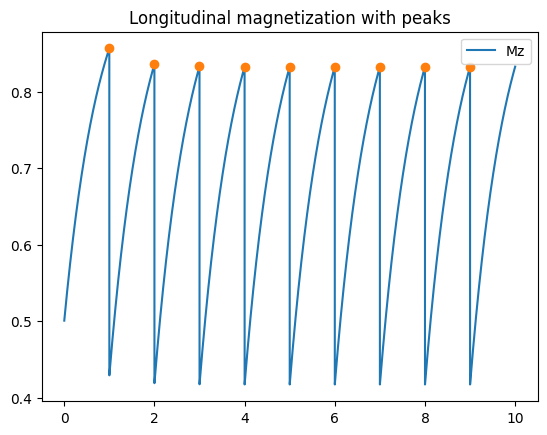

In [10]:
# plot mz with peaks
fig, ax = plt.subplots()
ax.plot(t, np.array([M[2,:]])[0], label='Mz')
ax.plot(t[peaks[0]], np.array([M[2,:]])[0][peaks[0]], "o")
ax.set_title('Longitudinal magnetization with peaks')
ax.legend()


In [11]:
# print peak heights
print(np.around(np.array([M[2,:]])[0][peaks[0]],4))

[0.8567 0.8362 0.8333 0.8329 0.8328 0.8328 0.8328 0.8328 0.8328]


Experimental z Mss: 0.833

In [12]:
z_mss_1=0.833

In [13]:
peaks_y = sp.signal.find_peaks(np.array([M[1,:]])[0])
print(np.around(np.array([M[1,:]])[0][peaks_y[0]],4))

[0.7327 0.7152 0.7127 0.7123 0.7123 0.7123 0.7123 0.7123 0.7123]


In [14]:
#1st method

My = np.array(M[1,:])

# get Mzs at excitation times
My_exc = np.around(np.array([My[0],My[1000], My[2000], My[3000], My[4000], My[5000], My[6000], My[7000], My[8000], My[9000]]),4)

print(My_exc)

[0.8553 0.7327 0.7152 0.7127 0.7123 0.7123 0.7123 0.7123 0.7123 0.7123]


Experimental y Mss: 0.712

In [15]:
y_mss_1 = 0.712

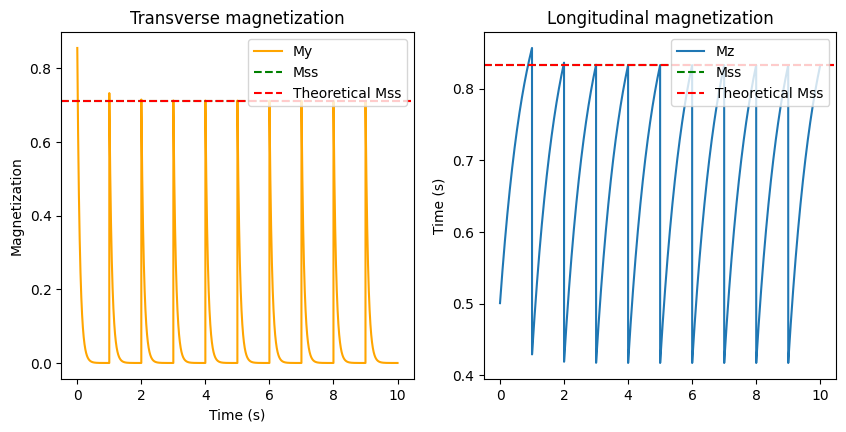

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5), sharex=True)
ax1.plot(t, np.array([M[1,:]])[0], label='My', color = "orange")
ax1.axhline(y_mss_1, linestyle = "dashed", color = "green", label = "Mss")
ax1.axhline(Mss_y, linestyle = "dashed", color = "red", label = "Theoretical Mss")
ax1.set_ylabel("Magnetization")
ax1.set_xlabel("Time (s)")
ax1.legend(loc='upper right')
ax2.plot(t, np.array([M[2,:]])[0], label='Mz')
ax2.axhline(z_mss_1, linestyle = "dashed", color = "green", label = "Mss")
ax2.axhline(Mss_z, linestyle = "dashed", color = "red", label = "Theoretical Mss")
ax1.set_title('Transverse magnetization')
ax2.set_title('Longitudinal magnetization')
ax2.set_ylabel("Time (s)")
ax2.legend(loc='upper right')

#### 4. Repeat 2 and 3, if TR is reduced to 100 ms and NEX is increased to 100 (yielding the same total study duration)

In [17]:
TR_100 = 100*10**-3 #TR = 100ms
NEX_100 = 100

Theoretical z Mss: 0.2103

In [18]:
Mss_z100 = (1-np.exp(-TR_100/T1))/(1-np.cos(angle)*np.exp(-TR_100/T1))
print(round(Mss_z100,4))

0.2103


Theoretical y Mss: 0.1799

In [19]:
Mss_y100 = (np.sin(angle)*(1-np.exp(-TR_100/T1))/(1-np.cos(angle)*np.exp(-TR_100/T1)))*np.exp(-TE/T2) # in reality, it is calculated using T2*, it will result in a lower value
print(round(Mss_y100,4))

0.1799


In [20]:
rotation_matrix = np.array([[1,0,0],
                          [0,np.cos(angle),np.sin(angle)],
                          [0,-np.sin(angle),np.cos(angle)]])

relax_matrix = np.array([[np.exp(-step/T2), 0, 0],
                         [0, np.exp(-step/T2), 0],
                         [0, 0, np.exp(-step/T1)]]) #relaxation matrix

M0 = np.array([[0,0,1]]).transpose() #initial magnetization vector

M_100 = np.zeros((3,int((TR_100*NEX_100)/step)+1)) #magnetization vector

# 10 excitations every TR

exc_times_100 = np.arange(TR_100/step,(TR_100*NEX_100)/step,TR_100/step) #excitation times

for i in range(0,int((TR_100*NEX_100)/step)+1):
    if i == 0:
        M_100[:,0:1] = np.dot(rotation_matrix,M0)
        M_100[:,0:1] = np.dot(relax_matrix, np.array([M_100[:,0]]).transpose()) + np.array([[0,0,(1-np.exp(-step/T1))]]).transpose()
    elif i in exc_times_100:
        M_100[:,i:i+1]=np.dot(rotation_matrix,np.array([M_100[:,i-1]]).transpose())
        M_100[:,i:i+1]=np.dot(relax_matrix, np.array([M_100[:,i]]).transpose()) + np.array([[0,0,(1-np.exp(-step/T1))]]).transpose()
    else:
        M_100[:,i:i+1]=np.dot(relax_matrix, np.array([M_100[:,i-1]]).transpose()) + np.array([[0,0,(1-np.exp(-step/T1))]]).transpose()


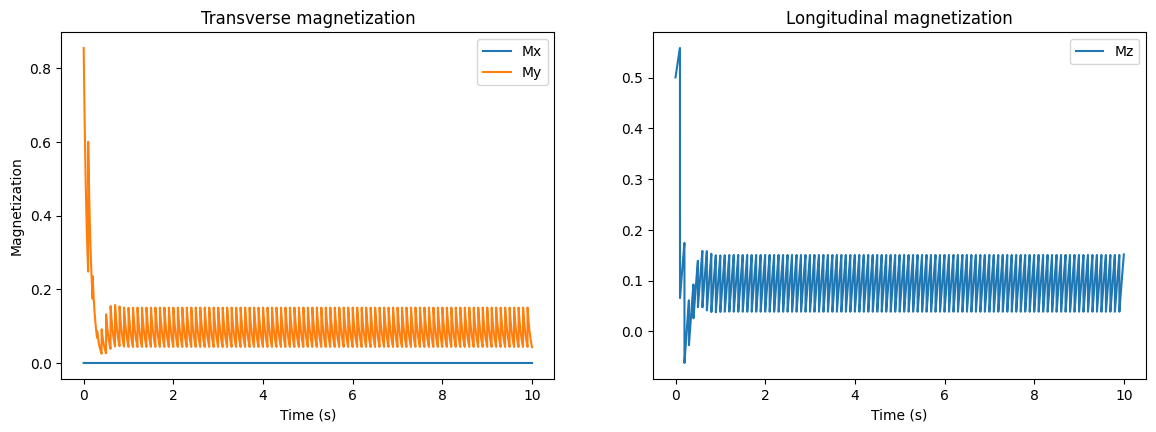

In [21]:
# create vector t for plotting
t100 = np.array(np.arange(0,TR_100*NEX_100+step,step))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4.5))
ax1.plot(t100, np.array([M_100[0,:]])[0], label='Mx')
ax1.plot(t100, np.array([M_100[1,:]])[0], label='My')
#ax1.plot(t100, np.exp(-t100/T2))
ax1.set_ylabel("Magnetization")
ax1.set_xlabel("Time (s)")
ax1.legend(loc='upper right')
ax2.plot(t100, np.array([M_100[2,:]])[0], label='Mz')
ax1.set_title('Transverse magnetization')
ax2.set_title('Longitudinal magnetization')
ax2.set_xlabel("Time (s)")
ax2.legend(loc='upper right')

The longer the TR, the greater the steady-state magnetization and fewer magnetizations are needed to reach it.

For a smaller TR, the steady-state magnetization is smaller and more magnetizations are needed to reach it.

In [22]:
Mz_100 = np.array(M_100[2,:])
Mz_exc_100 = np.array([])


# get Mzs at excitation times
for i in range(0,99):
    Mz_exc_100 = np.append(Mz_exc_100,np.array([Mz_100[int(exc_times_100[i]-1)]]))

print(np.around(Mz_exc_100,4))

[0.5588 0.1744 0.0613 0.0924 0.1392 0.1587 0.1582 0.153  0.1501 0.1497
 0.1502 0.1506 0.1507 0.1507 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506
 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506
 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506
 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506
 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506
 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506
 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506
 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506
 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506 0.1506]


Experimental z Mss: 0.1506

In [23]:
z_mss= 0.1506

In [24]:
My_100 = np.array(M_100[1,:])

# initialize array
My_exc_100 = np.array([])

# get Mzs at excitation times
for i in range(0,99):
    My_exc_100 = np.append(My_exc_100,np.array([My_100[int(exc_times_100[i])]]))

print(np.around(My_exc_100,4))

[0.6004 0.2352 0.0862 0.0914 0.1321 0.1546 0.1575 0.1534 0.1504 0.1496
 0.1499 0.1503 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504
 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504
 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504
 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504
 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504
 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504
 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504
 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504
 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504 0.1504]


Experimental y Mss: 0.1504

In [25]:
y_mss = 0.1504

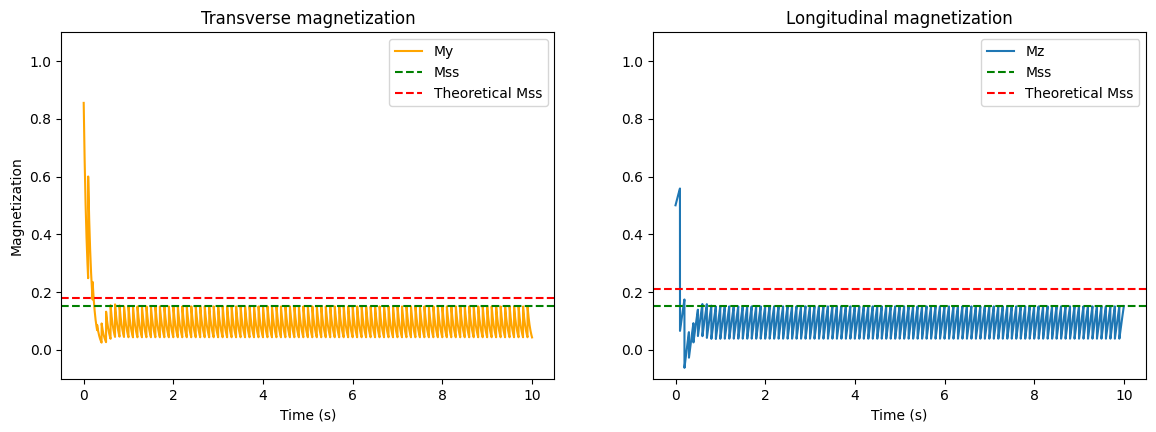

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4.5))
ax1.plot(t100, np.array([M_100[1,:]])[0], label='My', color ="orange")
ax1.axhline(y_mss, color = "green", linestyle = "dashed", label= "Mss")
ax1.axhline(Mss_y100, color = "red", linestyle = "dashed", label= "Theoretical Mss")
#ax1.plot(t100, np.exp(-t100/T2))
ax1.set_ylabel("Magnetization")
ax1.set_xlabel("Time (s)")
ax1.set_ylim([-0.1, 1.10])
ax1.legend(loc='upper right')
ax2.plot(t100, np.array([M_100[2,:]])[0], label='Mz')
ax1.set_title('Transverse magnetization')
ax2.set_title('Longitudinal magnetization')
ax2.set_xlabel("Time (s)")
ax2.legend(loc='upper right')
ax2.axhline(z_mss, color = "green", linestyle = "dashed", label= "Mss")
ax2.axhline(Mss_z100, color = "red", linestyle = "dashed", label= "Theoretical Mss")
ax2.set_ylim([-0.1, 1.10])
ax2.legend()

#### 5. Compute the Ernst angle, the flip angle that maximizes the value of Mss, for each TR value considered. Verify that the given value of 60 deg is close to optimal for TR = 1 s but not TR = 100 ms.

The Ernst angle is the angle at which the steady state magnetization is maximized for a certain TR.

$\cos(\theta) = \exp(-\frac {T_R}{T_1})$

In [27]:
# for original TR = 1000 ms

ernst_angle = np.arccos(np.exp(-TR/T1))
print("The Ernst angle for TR = 1000 ms is " +  str(round(ernst_angle*180/np.pi,3)))

# for TR = 100 ms

ernst_angle_100 = np.arccos(np.exp(-TR_100/T1))
print("The Ernst angle for TR = 100 ms is " + str(round(ernst_angle_100*180/np.pi,3)))



The Ernst angle for TR = 1000 ms is 73.351
The Ernst angle for TR = 100 ms is 28.055


#### 6. Repeat 4 using the Ernst angle for TR = 100 ms

In [28]:
E_angle = 28.055*np.pi/180 # Ernst angle for TR = 100 ms

rotation_matrix = np.array([[1,0,0],
                          [0,np.cos(E_angle),np.sin(E_angle)],
                          [0,-np.sin(E_angle),np.cos(E_angle)]])

relax_matrix = np.array([[np.exp(-step/T2), 0, 0],
                         [0, np.exp(-step/T2), 0],
                         [0, 0, np.exp(-step/T1)]]) #relaxation matrix

M0 = np.array([[0,0,1]]).transpose() #initial magnetization vector

M_6 = np.zeros((3,int((TR_100*NEX_100)/step)+1)) #magnetization vector

# 10 excitations every TR

exc_times_100 = np.arange(TR_100/step,(TR_100*NEX_100)/step,TR_100/step) #excitation times

for i in range(0,int((TR*NEX)/step)+1):
    if i == 0:
        M_6[:,0:1] = np.dot(rotation_matrix,M0)
        M_6[:,0:1] = np.dot(relax_matrix, np.array([M_6[:,0]]).transpose()) + np.array([[0,0,(1-np.exp(-step/T1))]]).transpose()
    elif i in exc_times_100:
        M_6[:,i:i+1]=np.dot(rotation_matrix,np.array([M_6[:,i-1]]).transpose())
        M_6[:,i:i+1]=np.dot(relax_matrix, np.array([M_6[:,i]]).transpose()) + np.array([[0,0,(1-np.exp(-step/T1))]]).transpose()
    else:
        M_6[:,i:i+1]=np.dot(relax_matrix, np.array([M_6[:,i-1]]).transpose()) + np.array([[0,0,(1-np.exp(-step/T1))]]).transpose()

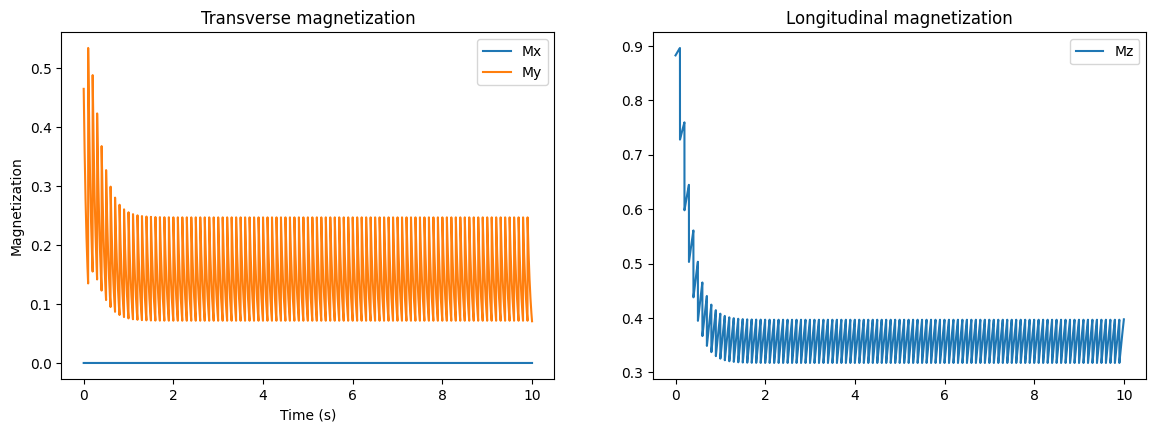

In [29]:
# create vector t for plotting
t100 = np.array(np.arange(0,TR_100*NEX_100+step,step))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4.5))
ax1.plot(t100, np.array([M_6[0,:]])[0], label='Mx')
ax1.plot(t100, np.array([M_6[1,:]])[0], label='My')
ax1.set_ylabel("Magnetization")
ax1.set_xlabel("Time (s)")
ax1.legend(loc='upper right')
ax2.plot(t100, np.array([M_6[2,:]])[0], label='Mz')
ax1.set_title('Transverse magnetization')
ax2.set_title('Longitudinal magnetization')
ax2.legend(loc='upper right')

Theoretical z Mss: 0.5312

In [30]:
Mss_z6 = (1-np.exp(-TR_100/T1))/(1-np.cos(E_angle)*np.exp(-TR_100/T1))
print(round(Mss_z6,4))

0.5312


Theoretical y Mss: 0.2467

In [31]:
Mss_y6 = (np.sin(E_angle)*(1-np.exp(-TR_100/T1))/(1-np.cos(E_angle)*np.exp(-TR_100/T1)))*np.exp(-TE/T2) # in reality, it is calculated using T2*, it will result in a lower value
print(round(Mss_y6,4))

0.2467


Experimental z Mss: 0.3969

In [32]:
Mz_6 = np.array(M_6[2,:])

# initialize array
Mz_exc_6 = np.array([])

# get Mzs at excitation times
for i in range(0,99):
    Mz_exc_6 = np.append(Mz_exc_6,np.array([Mz_6[int(exc_times_100[i]-1)]]))

print(np.around(Mz_exc_6,4))

[0.8963 0.7596 0.6448 0.561  0.5035 0.4654 0.4406 0.4246 0.4145 0.408
 0.4039 0.4013 0.3997 0.3987 0.398  0.3976 0.3973 0.3972 0.3971 0.397
 0.397  0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969
 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969
 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969
 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969
 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969
 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969
 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969
 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969 0.3969]


In [33]:
z_mss_6 = 0.3969

Experimental y Mss: 0.2467

In [34]:
My_6 = np.array(M_6[1,:])

# initialize array
My_exc_6 = np.array([])

# get Mzs at excitation times
for i in range(0,99):
    My_exc_6 = np.append(My_exc_6,np.array([My_6[int(exc_times_100[i])]]))

print(np.around(My_exc_6,4))

[0.5337 0.4878 0.4228 0.3675 0.3268 0.2988 0.2802 0.2681 0.2603 0.2553
 0.2522 0.2502 0.2489 0.2481 0.2476 0.2473 0.2471 0.247  0.2469 0.2468
 0.2468 0.2468 0.2468 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467
 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467
 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467
 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467
 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467
 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467
 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467
 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467 0.2467]


In [35]:
y_mss_6 = 0.2467

(-0.1, 1.1)

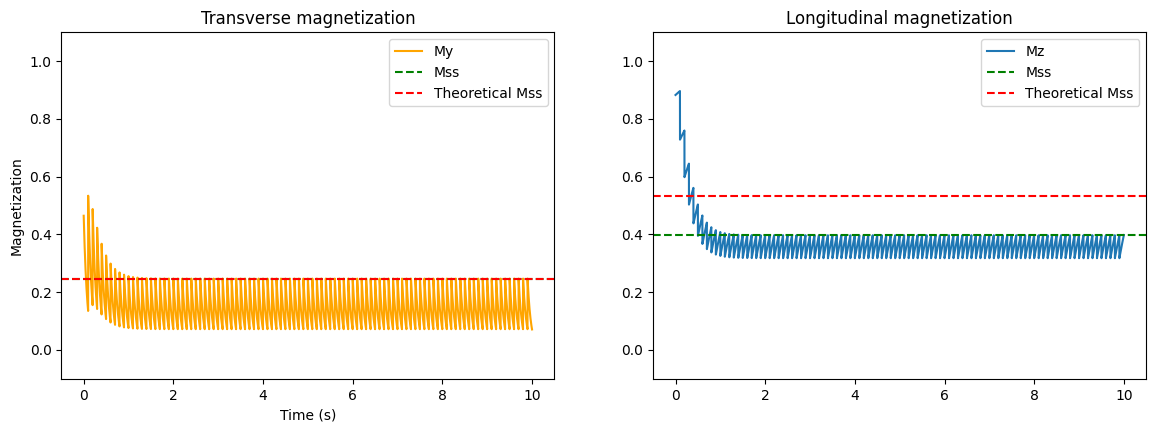

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4.5))
#ax1.plot(t100, np.array([M_6[0,:]])[0], label='Mx')
ax1.plot(t100, np.array([M_6[1,:]])[0], label='My', color = "orange")
ax1.axhline(y_mss_6, color = "green", linestyle = "dashed", label= "Mss")
ax1.axhline(Mss_y6, color = "red", linestyle = "dashed", label= "Theoretical Mss")
ax1.set_ylabel("Magnetization")
ax1.set_xlabel("Time (s)")
ax1.set_ylim([-0.1, 1.10])
ax1.legend(loc='upper right')
ax2.plot(t100, np.array([M_6[2,:]])[0], label='Mz')
ax1.set_title('Transverse magnetization')
ax2.set_title('Longitudinal magnetization')
ax2.legend(loc='upper right')
ax2.axhline(z_mss_6, color = "green", linestyle = "dashed", label= "Mss")
ax2.axhline(Mss_z6, color = "red", linestyle = "dashed", label= "Theoretical Mss")
ax2.legend()
ax2.set_ylim([-0.1, 1.10])

![alt text](results_final.jpg "Results table")

#### 7. Indicate how the SNR varies with NEX, and compare the overall SNR per unit time of Mss in 4 vs. 3 and 6 vs. 3

The NEX denotes how many times a signal from a given slice is measured.

Keeping TR constant: The SNR, which is proportional to the square root of the NEX, improves as the NEX increases

If TR decreases while the NEX increases, the SNR decreases because the signal is not able to recover as much of the transverse magnetization as it would with a larger TR.

Assuming, SNR $\propto$ $\sqrt(NEX)  \times M_{ss}(y)$

4 vs 3:

In [37]:
SNR_4 = np.sqrt(100)*y_mss
print("Question 4: SNR for TR = 100 ms and NEX = 100 is " + str(round(SNR_4,3)))

SNR_3 = np.sqrt(10)*y_mss_1
print("Question 3: SNR for TR = 1000 ms and NEX = 10 is " + str(round(SNR_3,3)))

SNR_pertime = SNR_4/SNR_3
print("The SNR per unit of time of Mss (4 v 3) is " + str(round(SNR_pertime,3)))

Question 4: SNR for TR = 100 ms and NEX = 100 is 1.504
Question 3: SNR for TR = 1000 ms and NEX = 10 is 2.252
The SNR per unit of time of Mss (4 v 3) is 0.668


6 vs 3:

In [38]:
SNR_6 = np.sqrt(100)*y_mss_6
print("Question 6: SNR for TR = 100 ms and NEX = 100 and using Ernst angle is " + str(round(SNR_6,3)))

print("Question 3: SNR for TR = 1000 ms and NEX = 10 is " + str(round(SNR_3,3)))

SNR_pertime_6 = SNR_6/SNR_3
print("The SNR per unit of time of Mss (6 v 3) is " + str(round(SNR_pertime_6,3)))

Question 6: SNR for TR = 100 ms and NEX = 100 and using Ernst angle is 2.467
Question 3: SNR for TR = 1000 ms and NEX = 10 is 2.252
The SNR per unit of time of Mss (6 v 3) is 1.096
